In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data

In [3]:
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship',
                'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
data = pd.read_csv('../../datasets/adult.data', names=column_names)
data.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


# Formal exploration

In [4]:
# dataset shapes
data.shape

(32561, 15)

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object 

Object features uniques count
workclass      :  9
education      :  16
marital-status :  7
occupation     :  15
relationship   :  6
race           :  5
sex            :  2
native-country :  42
income         :  2


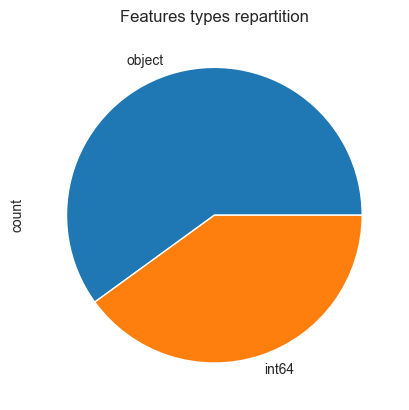

In [5]:
# features types
print(data.dtypes, '\n')
plt.figure()
data.dtypes.value_counts().plot.pie()
plt.title('Features types repartition')

print('Object features uniques count')
for obj_col in data.select_dtypes('object') :
    print(f"{f'{obj_col}' : <14} : ", len(data[obj_col].unique()))

Text(0.5, 1.0, 'Missing values')

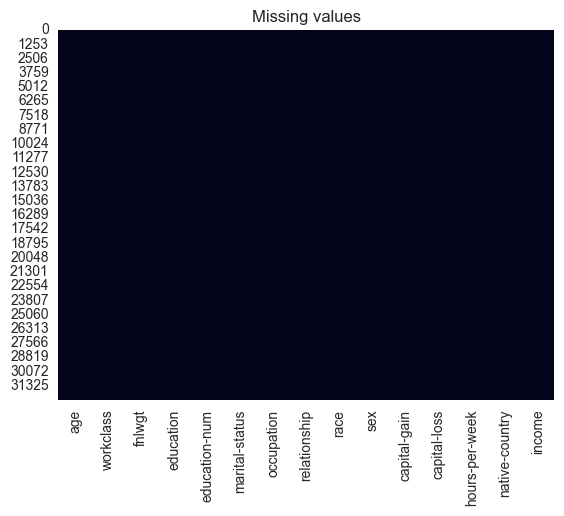

In [6]:
# missing values
sns.heatmap(data.isna(), cbar=False)
plt.title("Missing values")

<img src="https://i.imgflip.com/yzopk.jpg?a468120"  width="20%">

# Deep exploration

<Axes: ylabel='count'>

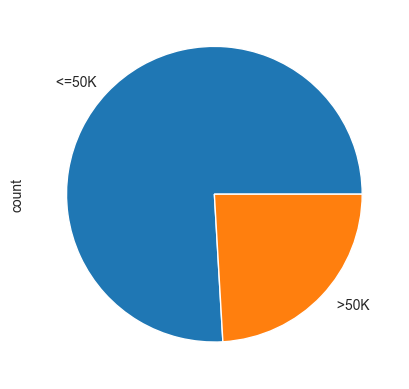

In [7]:
# target visualization
data.income.value_counts().plot.pie()

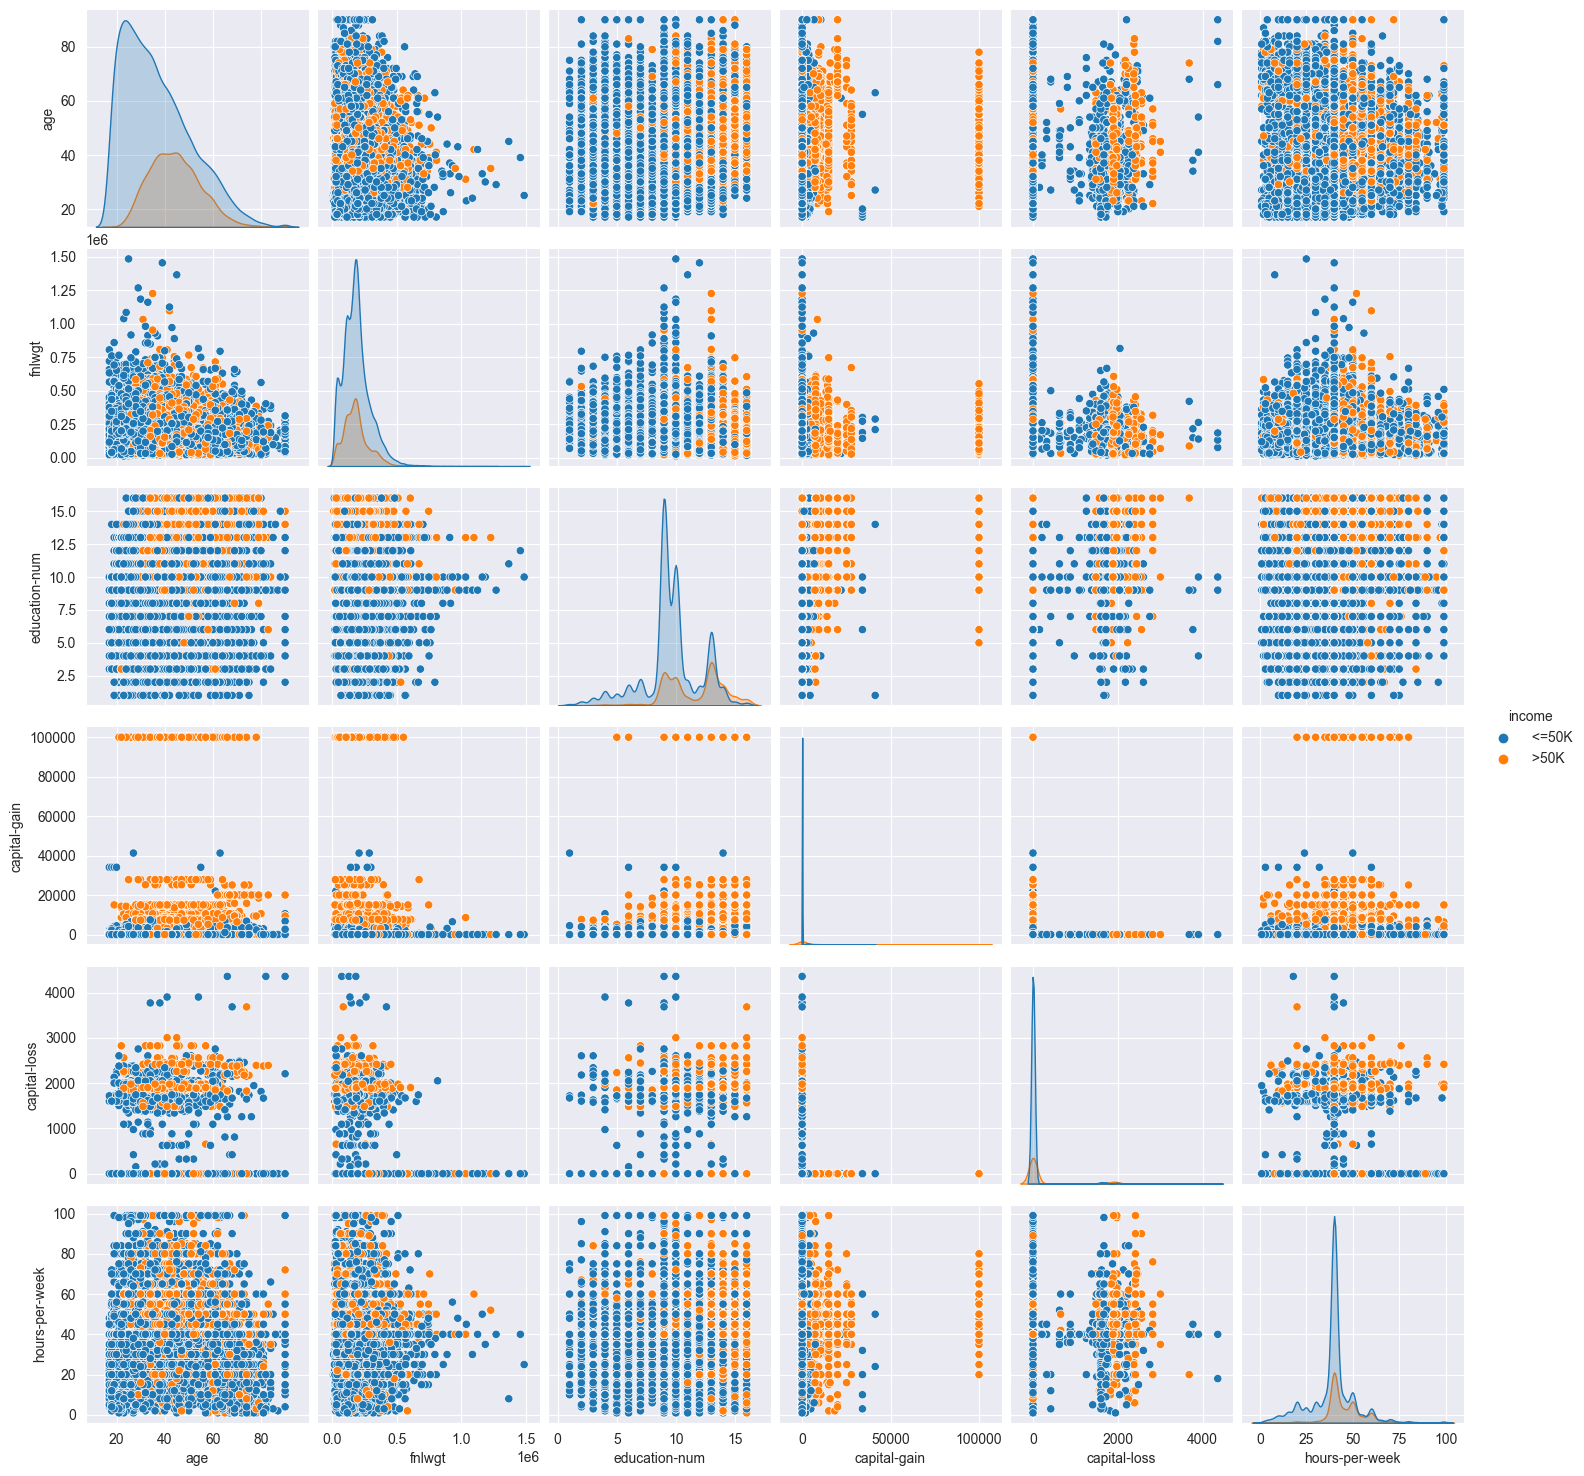

In [8]:
sns.pairplot(data, hue='income')

<Axes: >

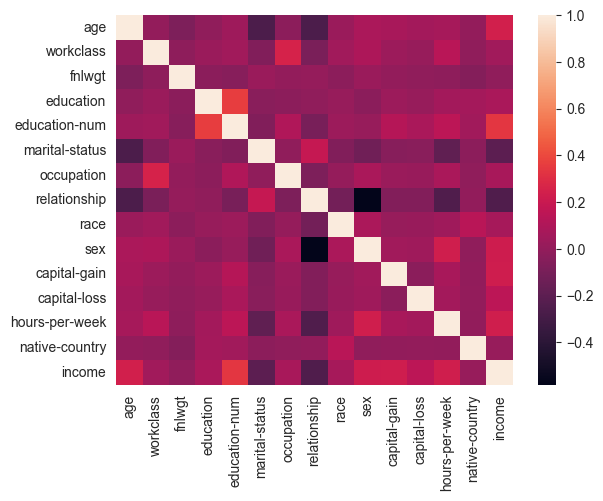

In [10]:
from sklearn.preprocessing import LabelEncoder
data_enc = data.copy()
for col in data_enc.select_dtypes('object'):
    encoder = LabelEncoder()
    data_enc[col] = encoder.fit_transform(data_enc[col])
sns.heatmap(data_enc.corr())

# Fairness exploration

In [28]:
protected_attributes = ['sex', 'race', 'native-country']

In [16]:
# print sorted correlation to target
data_enc.corr()['income'].sort_values(ascending=False)

income            1.000000
education-num     0.335154
age               0.234037
hours-per-week    0.229689
capital-gain      0.223329
sex               0.215980
capital-loss      0.150526
education         0.079317
occupation        0.075468
race              0.071846
workclass         0.051604
native-country    0.015840
fnlwgt           -0.009463
marital-status   -0.199307
relationship     -0.250918
Name: income, dtype: float64

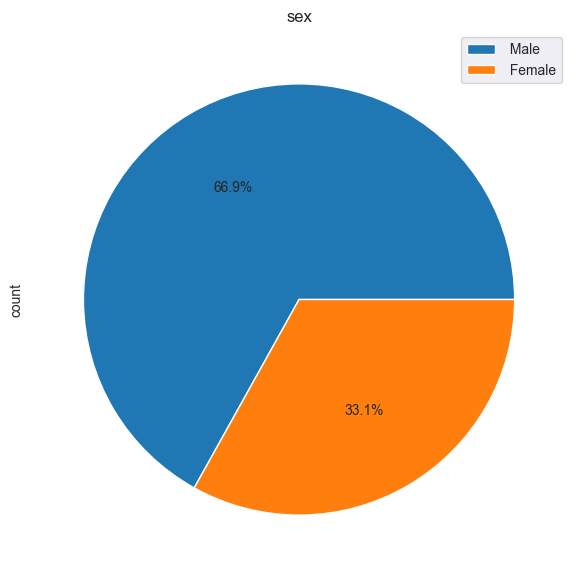

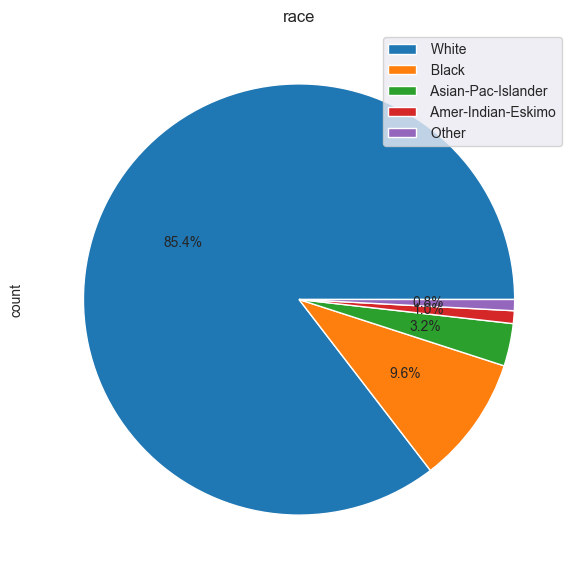

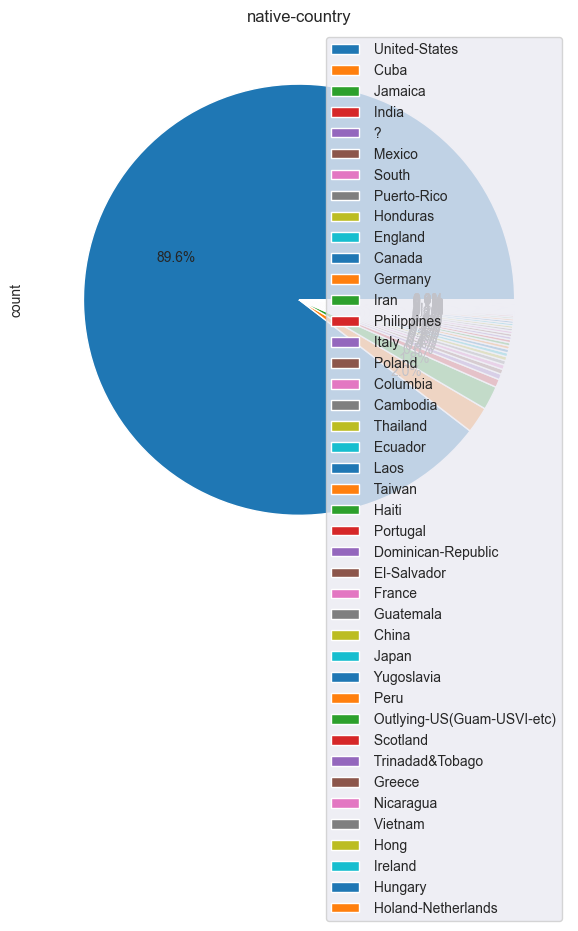

In [52]:
# plot protected attributes classes repartition
for attr in protected_attributes :
    plt.figure(figsize=(7,7))
    data[attr].value_counts().plot.pie(labels=None, autopct='%1.1f%%')
    plt.legend(loc='upper right', labels=data[attr].unique())
    plt.title(attr)
    bbox_to_anchor=(2.02, 1)

In [44]:
from sklearn.feature_selection import SelectKBest, chi2
for i in range(1, len(data.columns[:-1])):
    selector = SelectKBest(chi2, k=i)
    selector.fit_transform(data_enc.drop('income', axis=1), data.income)
    intersect = set(data.columns[:-1][selector.get_support()]).intersection(protected_attributes)
    if len(intersect) > 0:
        print(i, intersect)
        break

10 {'sex'}
